# Reinforcement Learning: Thompson Sampling

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Import dataset

In [2]:
#in a real world environment we would not have this simulation dataset.
dataset = pd.read_csv('../Ads_CTR_Optimisation.csv')

## Implement Thompson Sampling

In [4]:
from random import betavariate
#Step 1
N = 500
d = 10
ads_selected = []
Ni_1_n_number_of_rewards_1 = [0] * d
Ni_0_n_number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
#Step 2
    for i in range(0,d):
        random_beta = random.betavariate(Ni_1_n_number_of_rewards_1[i] + 1, Ni_0_n_number_of_rewards_0[i] + 1)
#Step 3
        if(random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if(reward == 1):
        Ni_1_n_number_of_rewards_1[ad] = Ni_1_n_number_of_rewards_1[ad] + 1
    else:
        Ni_0_n_number_of_rewards_0[ad] = Ni_0_n_number_of_rewards_0[ad] + 1
    total_reward = total_reward + 1

## Visualise the results

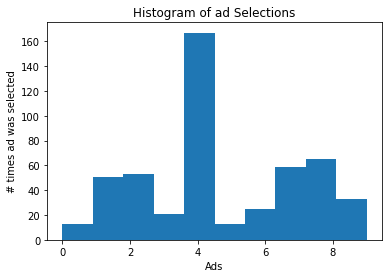

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ad Selections')
plt.xlabel('Ads')
plt.ylabel('# times ad was selected')
plt.show()

500 is not enough to identify that ad 4 was the best one to run with UCB,
however Thompson Sampling was able to.